In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_csv("transoformed_data.csv")

In [15]:
df.shape

(70431, 45)

In [16]:
df.tail(30)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,health_index,severity_of_disease,number_of_changes
70401,0,1,55,1,1,7,13,missing,74,6,...,-20,-20,-20,-20,1,1,0,1.000000,0.000033,1
70402,2,1,75,1,2,7,8,high_freq,67,3,...,-20,-20,-20,-20,1,1,0,1.000000,0.000024,1
70403,0,1,55,1,2,7,9,missing,81,6,...,-20,-20,-20,-20,-1,1,0,1.000000,0.000026,0
70404,0,0,75,1,1,7,2,missing,48,0,...,-20,-20,-20,-20,-1,1,0,1.000000,0.000015,0
70405,0,1,15,1,1,7,1,high_freq,59,6,...,-20,-20,-20,-20,1,1,0,1.000000,0.000015,1
70406,0,1,55,1,1,7,5,high_freq,71,5,...,-20,-20,-20,-20,1,1,0,1.000000,0.000022,2
70407,0,0,75,1,2,7,6,missing,40,1,...,-20,-20,-20,-20,1,1,0,0.111111,0.000015,1
70408,0,0,75,1,1,7,3,missing,58,0,...,-20,-20,-20,-20,1,1,0,1.000000,0.000018,1
70409,0,1,65,3,1,1,3,missing,41,1,...,-20,-20,-20,-20,-1,1,0,1.000000,0.000013,0
70410,1,1,65,5,1,9,7,high_freq,91,4,...,-20,-20,-20,-20,-1,1,0,1.000000,0.000027,0


<function matplotlib.pyplot.show(close=None, block=None)>

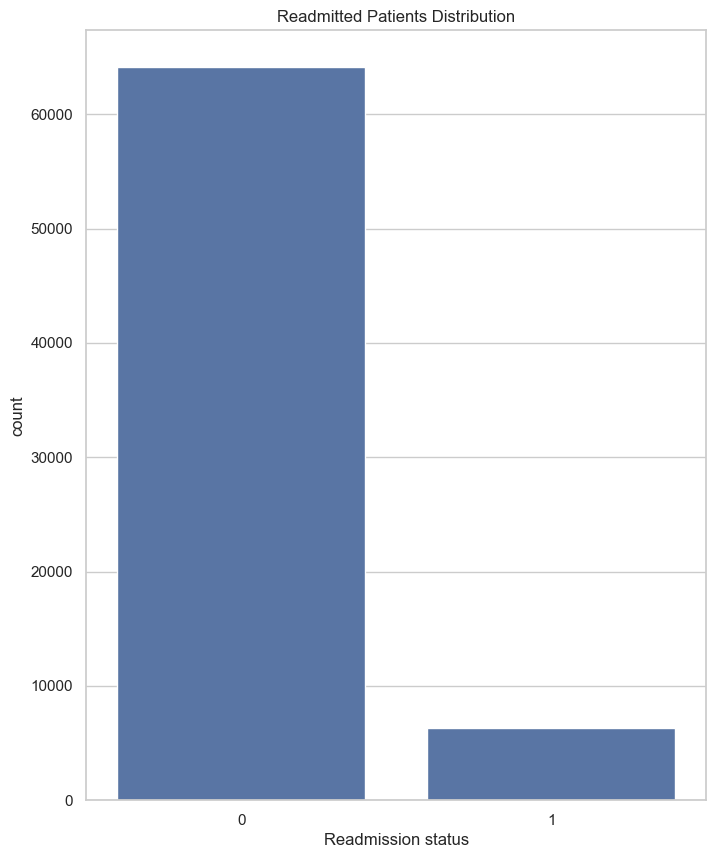

In [17]:
# the distribution of unique classes of the target variable, i.e., readmitted
sns.set(style='whitegrid')
plt.figure(figsize=(8,10))
sns.countplot(data=df,x='readmitted')
plt.title('Readmitted Patients Distribution')
plt.xlabel('Readmission status')
plt.ylabel('count')
plt.show

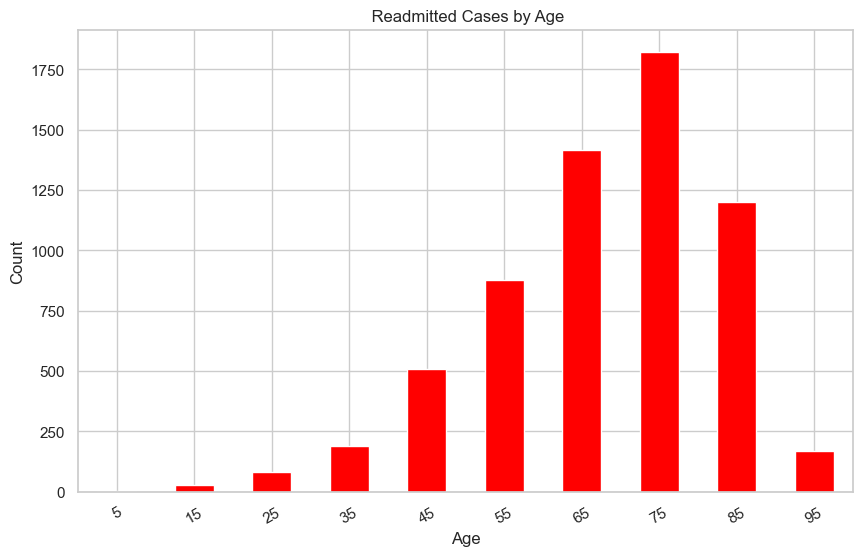

In [18]:
# The count of number of readmitted cases against age
readmitted_df = df[df['readmitted'] == 1]

# Grouping by age and count of readmitted cases
age_readmitted_counts = readmitted_df['age'].value_counts().sort_index()

# Plotting
age_readmitted_counts.plot(kind='bar', figsize=(10, 6), color='red')
plt.title(' Readmitted Cases by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

In [19]:
print("Readmitted Cases by Age:")
print(age_readmitted_counts)

Readmitted Cases by Age:
age
5        3
15      26
25      83
35     188
45     507
55     879
65    1414
75    1824
85    1201
95     168
Name: count, dtype: int64


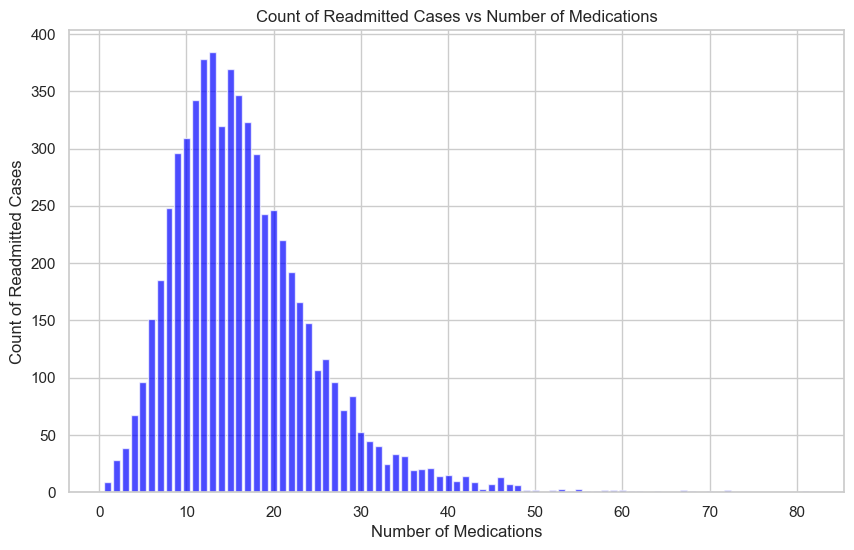

In [20]:
#Plot a graph that displays the count of target variable against the number of medications
# Filtering data for cases where 'readmitted' is 'Yes'
readmitted_df = df[df['readmitted'] == 1]

# Grouping by number of medications and counting occurrences
medication_counts = readmitted_df['num_medications'].value_counts().sort_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(medication_counts.index, medication_counts.values, color='blue', alpha=0.7)
plt.xlabel('Number of Medications')
plt.ylabel('Count of Readmitted Cases')
plt.title('Count of Readmitted Cases vs Number of Medications')
plt.grid(True)
plt.show()

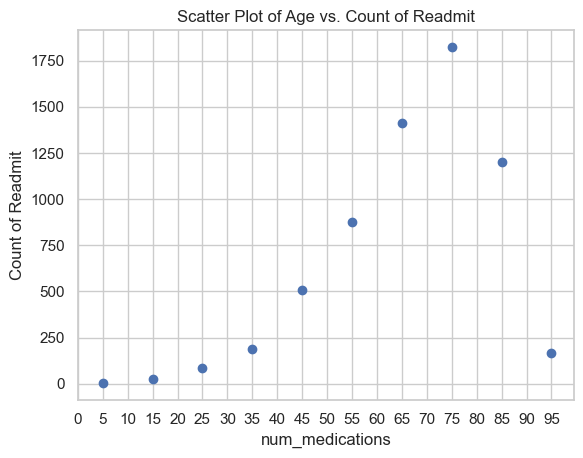

In [21]:
filtered_df = df[df['readmitted'] == 1]

# Count the occurrences of each age value in the filtered DataFrame
age_counts = filtered_df['age'].value_counts().sort_index()

# Plot the scatter plot of count of age values vs. 'readmitted'
plt.scatter(age_counts.index, age_counts.values)
plt.xlabel('num_medications')
plt.ylabel('Count of Readmit')
plt.title('Scatter Plot of Age vs. Count of Readmit')
plt.xticks(range(0, max(age_counts.index) + 1, 5))

plt.show()

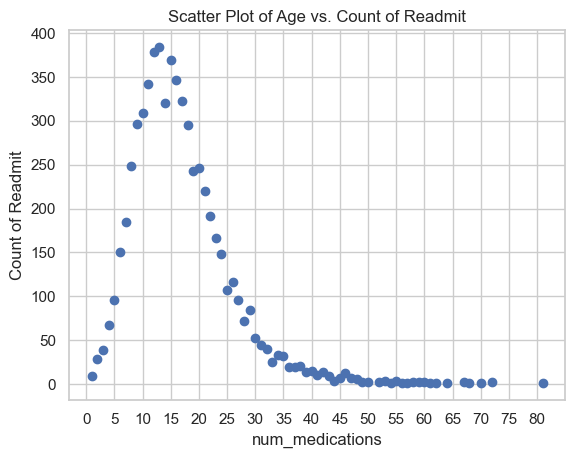

In [22]:
filtered_df = df[df['readmitted'] == 1]

# Count the occurrences of each age value in the filtered DataFrame
age_counts = filtered_df['num_medications'].value_counts().sort_index()

# Plot the scatter plot of count of age values vs. 'readmitted'
plt.scatter(age_counts.index, age_counts.values)
plt.xlabel('num_medications')
plt.ylabel('Count of Readmit')
plt.title('Scatter Plot of Age vs. Count of Readmit')
plt.xticks(range(0, max(age_counts.index) + 1, 5))

plt.show()

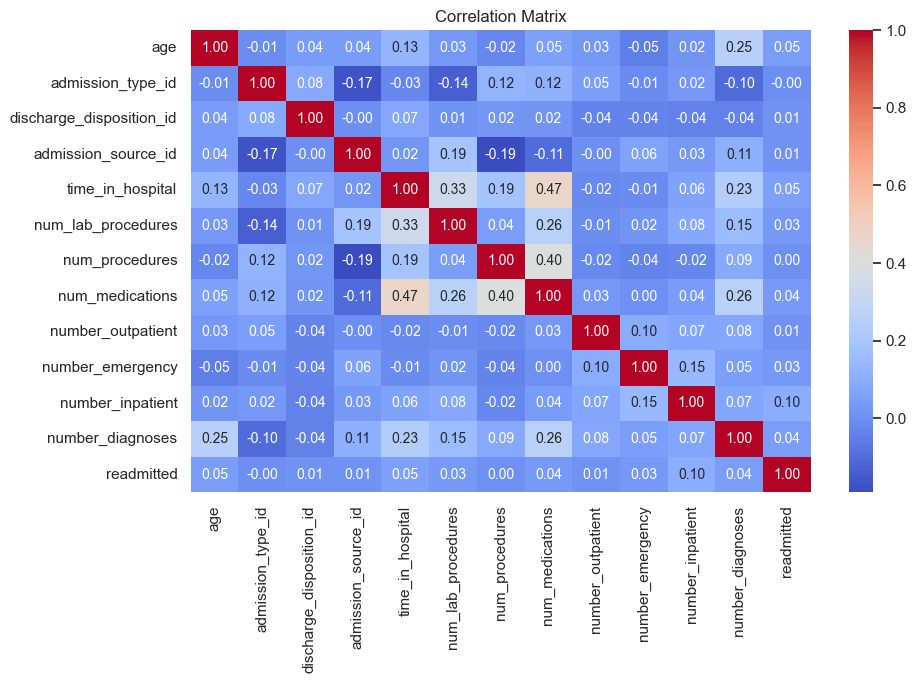

In [23]:
#correlatio matrix
numeric_cols = ['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
                'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 
                'readmitted']
numeric_df = df[numeric_cols]  # Select numeric columns only
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

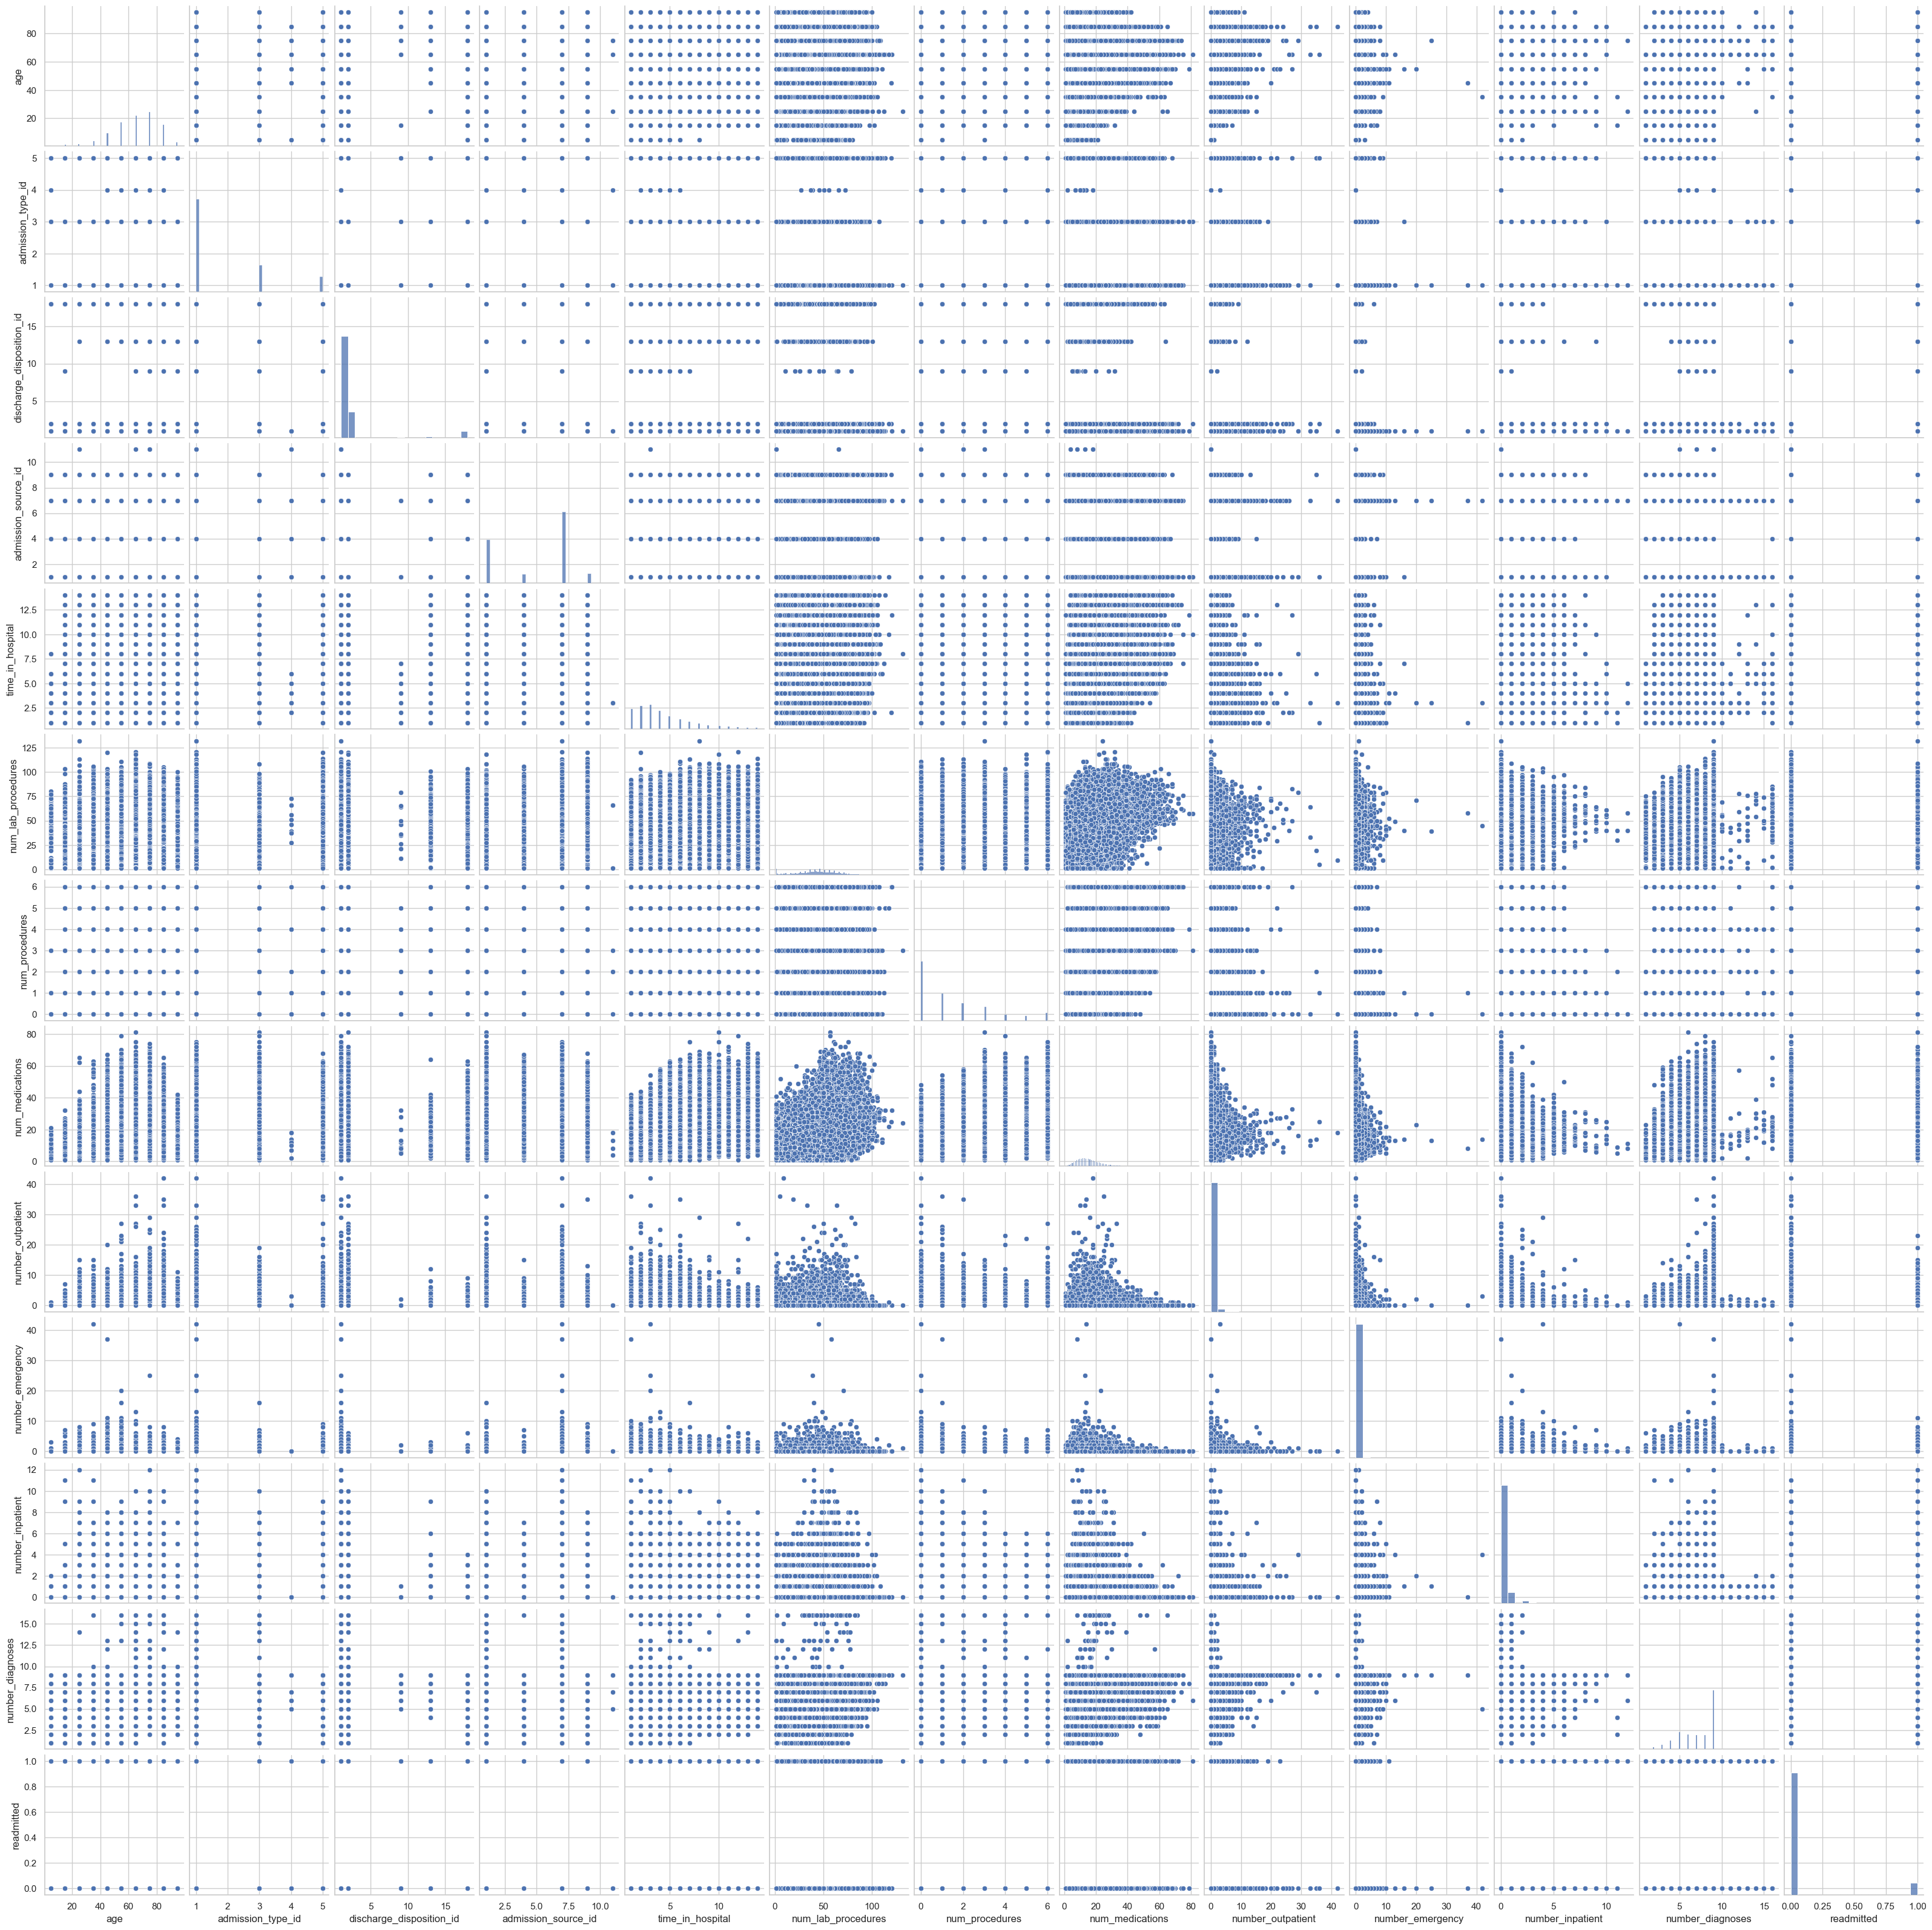

In [25]:
#scatter matrix
sns.pairplot(df[numeric_cols])
plt.show()